In [1]:
import numpy as np
import xarray as xr
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
from keras import models, layers
from keras.layers import Input
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

/Users/nathanchen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
aod = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/MERRA_aod_regrid.nc")
pwv00 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_pwv00_regrid.nc")
cw00 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_cw00_regrid.nc")
tk200 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_tk200_regrid.nc")
ps00 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_ps00_regrid.nc")
qv200 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_qv200_regrid.nc")
pwv12 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_pwv12_regrid.nc")
cw12 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_cw12_regrid.nc")
tk212 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_tk212_regrid.nc")
ps12 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_ps12_regrid.nc")
qv212 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_qv212_regrid.nc")
imerg = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/imerg_regrid.nc")

In [3]:
def normalize_to_range(values, original_min, original_max, new_min=0, new_max=1):
    return new_min + (values - original_min) * (new_max - new_min) / (original_max - original_min)

In [145]:
np.isnan(ps00.ps.values).sum()


0

In [4]:
aod00_values = aod["AODANA"].values
aod00_values = aod00_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = aod00_values.min()
data_max = aod00_values.max()
print(data_min, data_max)
# Normalize to [0, 1]
aod00_normal = normalize_to_range(aod00_values, data_min, data_max)
aod00_normal.shape

-0.0002094373892734953 18.828499221801607


(10224, 140, 150)

In [5]:
pwv00_values = pwv00["pwv"].values
pwv00_values = pwv00_values[:, ::-1, :]
# # Get the minimum and maximum values of the variable
data_min = pwv00_values.min()
data_max = pwv00_values.max()
print(data_min, data_max)

# # Normalize to [0, 1]
pwv00_normal = normalize_to_range(pwv00_values, data_min, data_max)
pwv00_normal.shape
# type(pwv_values)

-6.133454799640523 99.73744277947904


(10224, 140, 150)

In [6]:
cw00_values = cw00["cw"].values
cw00_values = cw00_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = cw00_values.min()
data_max = cw00_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
cw00_normal = normalize_to_range(cw00_values, data_min, data_max)
cw00_normal.shape

0.0 5.471999931334786


(10224, 140, 150)

In [7]:
tk200_values = tk200["tk2"].values
tk200_values = tk200_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = tk200_values.min()
data_max = tk200_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
tk200_normal = normalize_to_range(tk200_values, data_min, data_max)
tk200_normal.shape

230.6000000000119 322.1400085449227


(10224, 140, 150)

In [8]:
ps00_values = ps00["ps"].values
ps00_values = ps00_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = ps00_values.min()
data_max = ps00_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
ps00_normal = normalize_to_range(ps00_values, data_min, data_max)
ps00_normal.shape

-2.9955663680881126 104852.21093749395


(10224, 140, 150)

In [9]:
qv200_values = qv200["qv2"].values
qv200_values = qv200_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = qv200_values.min()
data_max = qv200_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
qv200_normal = normalize_to_range(qv200_values, data_min, data_max)
qv200_normal.shape

5.371703039703542e-16 298.8202819824166


(10224, 140, 150)

In [9]:
pwv12_values = pwv12["pwv"].values
pwv12_values = pwv12_values[:, ::-1, :]
# # Get the minimum and maximum values of the variable
data_min = pwv12_values.min()
data_max = pwv12_values.max()
print(data_min, data_max)

# # Normalize to [0, 1]
pwv12_normal = normalize_to_range(pwv12_values, data_min, data_max)
pwv12_normal.shape

0.10000000149490518 65.29114837646459


(10224, 140, 150)

In [10]:
cw12_values = cw12["cw"].values
cw12_values = cw12_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = cw12_values.min()
data_max = cw12_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
cw12_normal = normalize_to_range(cw12_values, data_min, data_max)
cw12_normal.shape

0.0 7.900000095364561


(10224, 140, 150)

In [12]:
tk212_values = tk212["tk2"].values
tk212_values = tk212_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = tk212_values.min()
data_max = tk212_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
tk212_normal = normalize_to_range(tk212_values, data_min, data_max)
tk212_normal.shape

230.82400207518864 323.44000244140705


(10224, 140, 150)

In [13]:
ps12_values = ps12["ps"].values
ps12_values = ps12_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = ps12_values.min()
data_max = ps12_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
ps12_normal = normalize_to_range(ps12_values, data_min, data_max)
ps12_normal.shape

64889.09375001281 104828.46093749434


(10224, 140, 150)

In [14]:
qv212_values = qv212["qv2"].values
qv212_values = qv212_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = qv212_values.min()
data_max = qv212_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
qv212_normal = normalize_to_range(qv212_values, data_min, data_max)
qv212_normal.shape

0.0 0.021371364593505714


(10224, 140, 150)

In [11]:
imerg_values = imerg["precipitation"].values
imerg_values = imerg_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = imerg_values.min()
data_max = imerg_values.max()
print(data_min, data_max)
# Normalize to [0, 1]
imerg_normal = normalize_to_range(imerg_values, data_min, 50)
imerg_normal.shape
imerg_normal.min(), imerg_normal.max()

0.0 81.61


(0.0, 1.6322)

In [15]:
#single mean per
imerg_mean = imerg.mean(dim=("lat", "lon"))

imerg_mean = imerg_mean["precipitation"].values
imerg_mean = imerg_mean.astype(np.float64)


data_min = imerg_mean.min()
data_max = imerg_mean.max()

print(data_min, data_max)

imerg_mean = normalize_to_range(imerg_mean, data_min, data_max)
imerg_mean.shape



0.0 1.3120375871658325


(10224,)

In [12]:
# combined_array = np.stack((aod00_normal, pwv00_normal, cw00_normal, pwv12_normal, cw12_normal), axis=-1)
combined_array = np.stack((aod00_normal, pwv00_normal, cw00_normal, pwv12_normal, cw12_normal), axis=-1)

combined_array.shape

(10224, 140, 150, 5)

In [13]:
subset_train_input = combined_array[:7500]
subset_train_output = imerg_normal[:7500]

subset_test_input = combined_array[7500:]
subset_test_output = imerg_normal[7500:]

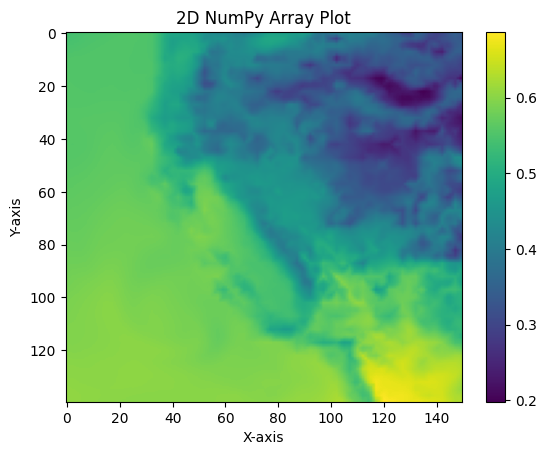

In [75]:
plt.imshow(tk212_normal[0], cmap='viridis')  # You can choose different colormaps like 'gray', 'hot', etc.
plt.colorbar()  # Add a colorbar to show the scale
plt.title("2D NumPy Array Plot")
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [14]:

model = models.Sequential()
model.add(Input(shape=(140, 150, 5)))

# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.3))

# Flatten and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(2048, activation='relu'))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(4096, activation='relu'))
# model.add(layers.Dropout(0.4))
model.add(layers.Dense(8192, activation='relu'))
model.add(layers.Dropout(0.4))
# model.add(layers.Dense(16384, activation='relu'))
# model.add(layers.Dropout(0.4))
model.add(layers.Dense(21000))

# Reshape to the original image dimensions
model.add(layers.Reshape((140, 150)))

2024-07-24 10:54:40.189712: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-07-24 10:54:40.189840: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-07-24 10:54:40.189858: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-07-24 10:54:40.190451: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-24 10:54:40.190881: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [72]:
# FOR MEAN PRECIPITATION
model = models.Sequential()
model.add(Input(shape=(140, 150, 5))) #(aod00_normal, pwv00_normal, cw00_normal, pwv12_normal, cw12_normal)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# model.add(layers.Dense(1500, activation='relu'))
# model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 138, 148, 64)   │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 69, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 69, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 326784)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   334,627,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8192)           │     8,396,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21000)          │   172,053,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 140, 150)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,080,584 (1.92 GB)

 Trainable params: 515,080,584 (1.92 GB)

 Non-trainable params: 0 (0.00 B)

In [17]:
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

SUCCESS: Found GPU: /device:GPU:0


2024-07-22 10:02:56.534635: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-22 10:02:56.534653: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-07-22 10:02:56.534742: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-22 10:02:56.534759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
model.compile(optimizer = 'adam', 
              loss=tf.keras.losses.MeanSquaredError(), 
              metrics=['mean_squared_error'])

history = model.fit(subset_train_input, subset_train_output, epochs = 5,
                    validation_data = (subset_test_input, subset_test_output))

Epoch 1/5


2024-07-24 10:55:02.193233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


235/235 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - loss: 7.0556e-05 - mean_squared_error: 7.0556e-05 - val_loss: 7.7642e-05 - val_mean_squared_error: 7.7642e-05
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - loss: 7.0506e-05 - mean_squared_error: 7.0506e-05 - val_loss: 7.5307e-05 - val_mean_squared_error: 7.5307e-05
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - loss: 6.6567e-05 - mean_squared_error: 6.6567e-05 - val_loss: 7.1583e-05 - val_mean_squared_error: 7.1583e-05
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - loss: 6.9366e-05 - mean_squared_error: 6.9366e-05 - val_loss: 6.9541e-05 - val_mean_squared_error: 6.9541e-05
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - loss: 6.3974e-05 - mean_squared_error: 6.3974e-05 - val_loss: 7.0371e-05 - val_mean_squared_error: 7.0371e-05


In [ ]:
# LOWEST MSE:
# FOR MEAN PRECIPITATION
model = models.Sequential()
model.add(Input(shape=(140, 150, 5)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
# model.add(layers.Dense(1500, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
'''
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 61s 251ms/step - loss: 6.0784 - mean_squared_error: 6.0784 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 92s 390ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 91s 388ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 91s 388ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 91s 387ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
'''

In [ ]:
#BEST ALIGNED VALUES:

# FOR MEAN PRECIPITATION
model = models.Sequential()
model.add(Input(shape=(140, 150, 5))) #(aod00_normal, pwv00_normal, cw00_normal, pwv12_normal, cw12_normal)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# model.add(layers.Dense(1500, activation='relu'))
# model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

'''
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 181ms/step - loss: 1.2073 - mean_squared_error: 1.2073 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
'''

In [21]:
model.evaluate(subset_test_input, subset_test_output, )


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0037 - mean_squared_error: 0.0037


[0.004754805471748114, 0.004754805471748114]

In [17]:
testing = model.predict(subset_test_input[:250], verbose='auto')

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


In [53]:
print(subset_test_output[100], testing[100])

0.02255524691425327 [0.0056034]


# testing images

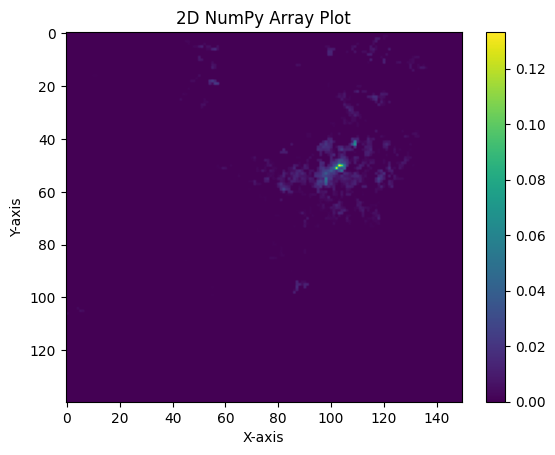

In [48]:
plt.imshow(subset_test_output[160, :, :], cmap='viridis')  # You can choose different colormaps like 'gray', 'hot', etc.
plt.colorbar()  # Add a colorbar to show the scale
plt.title("2D NumPy Array Plot")
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

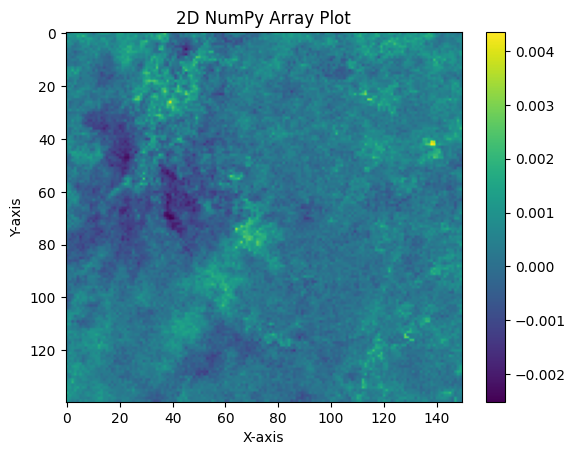

In [49]:
plt.imshow(testing[160, :, :], cmap='viridis')  # You can choose different colormaps like 'gray', 'hot', etc.
plt.colorbar()  # Add a colorbar to show the scale
plt.title("2D NumPy Array Plot")
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [119]:
subset_test_output[:250].shape

(250, 140, 150)

In [120]:
test_input_mean = np.mean(subset_test_output[:250], axis=(1, 2))
testing_mean = np.mean(testing, axis=(1, 2))

Text(0, 0.5, 'Average Precipitation Across Map Area')

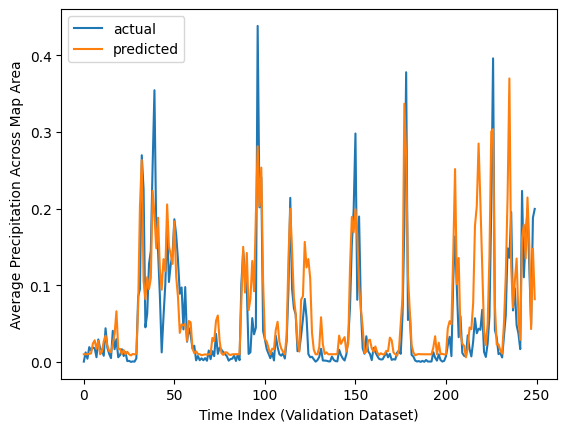

In [121]:
plt.plot(test_input_mean, label = 'actual')
plt.plot(testing_mean, label='predicted')

plt.legend()
plt.xlabel('Time Index (Validation Dataset)')
plt.ylabel('Average Precipitation Across Map Area')

# testing mean

Text(0, 0.5, 'Average Precipitation Across Map Area')

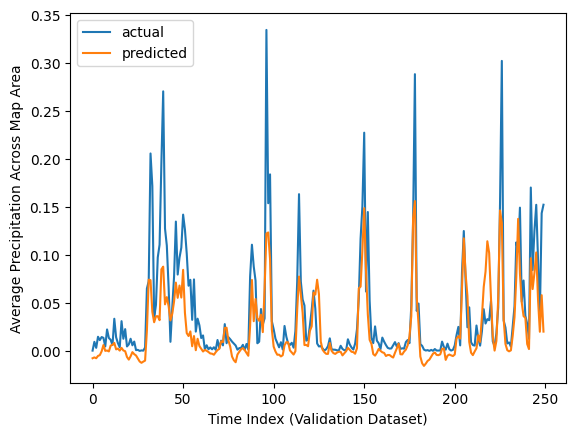

In [66]:
plt.plot(subset_test_output[:250], label = 'actual')
plt.plot(testing[:250], label='predicted')

plt.legend()
plt.xlabel('Time Index (Validation Dataset)')
plt.ylabel('Average Precipitation Across Map Area')

Text(0, 0.5, 'Average Precipitation Across Map Area')

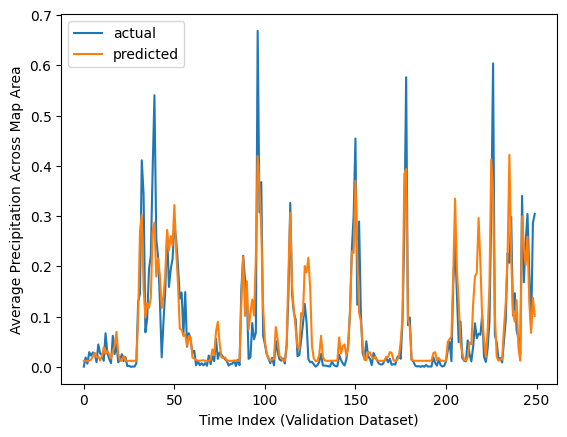

In [95]:
plt.plot(subset_test_output[:250], label = 'actual')
plt.plot(testing, label='predicted')

plt.legend()
plt.xlabel('Time Index (Validation Dataset)')
plt.ylabel('Average Precipitation Across Map Area')

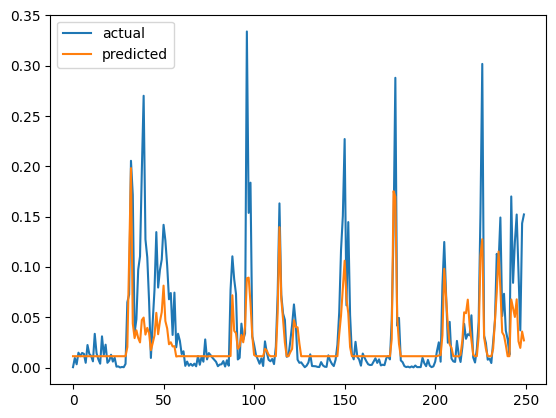

In [45]:
plt.plot(subset_test_output[:250], label = 'actual')
plt.plot(testing[:250], label='predicted')

plt.legend()

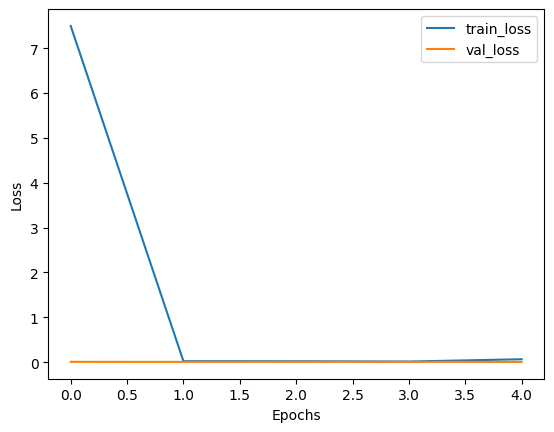

In [24]:
#128, 64
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label = 'val_mean_squared_error')
plt.xlabel('Epoch')
plt.ylabel('mean_squared_error')
plt.ylim([data_min, 0.2])
plt.legend(loc='lower right')

In [16]:
test_loss, test_acc = model.evaluate(subset_test_input,  subset_test_output, verbose=2)

print(test_loss, test_acc)

86/86 - 1s - 14ms/step - loss: 0.0138 - mean_squared_error: 0.0138
0.013801557943224907 0.013801557943224907
